## Part A: Baseline Model — Analysis

In [41]:
# Header / reproducibility / imports
import os
RANDOM_STATE = 42

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8,5)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, classification_report,
                             precision_recall_fscore_support, roc_auc_score,
                             average_precision_score)

# Utility: display versions
import sklearn, imblearn

print("numpy", np.__version__, "pandas", pd.__version__)
print("sklearn", sklearn.__version__)
try:
    import imblearn
    print("imblearn", imblearn.__version__)
except Exception:
    print("imblearn not installed in this environment.")

numpy 2.2.6 pandas 2.3.1
sklearn 1.7.1
imblearn 0.14.0


In [42]:
# Load the dataset
data_path = "creditcard.csv"

if not os.path.exists(data_path):
    raise FileNotFoundError(f"Dataset not found at '{data_path}'. Please upload 'creditcard.csv' or adjust data_path.")

df = pd.read_csv(data_path)
print("Shape:", df.shape)
df.head()

Shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [43]:
# Quick sanity checks & feature overview
print("Columns:", df.columns.tolist())
print("\nMissing values per column:\n", df.isna().sum())
print("\nClass value counts:")
print(df['Class'].value_counts())
df.describe().T

Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

Missing values per column:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Class value counts:
Class
0    284315
1       492
Name: count, dtype: int64


,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


        count  percent
Class                 
0      284315  99.8273
1         492   0.1727


/tmp/ipykernel_783/3264355177.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette=['C0','C3'])


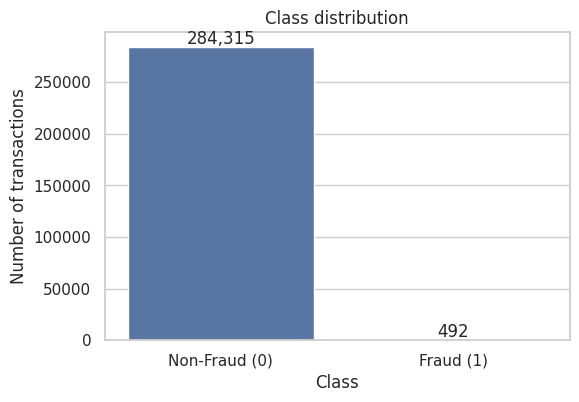

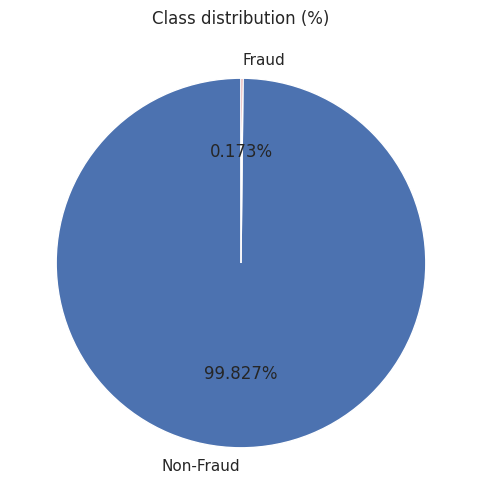

Imbalance ratio (majority / minority): 577.88 : 1


In [44]:
# Analyze class imbalance (counts + percentages) and plot
counts = df['Class'].value_counts()
pct = df['Class'].value_counts(normalize=True) * 100
print(pd.DataFrame({"count": counts, "percent": pct.round(4)}))

# Bar plot
plt.figure(figsize=(6,4))
sns.barplot(x=counts.index, y=counts.values, palette=['C0','C3'])
plt.xticks([0,1], ['Non-Fraud (0)', 'Fraud (1)'])
plt.ylabel("Number of transactions")
plt.title("Class distribution")
for i, v in enumerate(counts.values):
    plt.text(i, v + max(counts.values)*0.01, f"{v:,}", ha='center')
plt.show()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(counts.values, labels=['Non-Fraud', 'Fraud'], autopct='%1.3f%%', startangle=90, colors=['C0','C3'])
plt.title("Class distribution (%)")
plt.show()

# Print imbalance ratio
imbalance_ratio = counts[0] / counts[1]
print(f"Imbalance ratio (majority / minority): {imbalance_ratio:.2f} : 1")

In [45]:
# Train-test split (keep test imbalanced)
X = df.drop(columns=['Class'])
y = df['Class']

# stratify=y will keep test's class proportion same as original
X_train, X_val_test, y_train, y_val_test = train_test_split(
    X, y, test_size=0.3, random_state=RANDOM_STATE, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_val_test, y_val_test, test_size=0.5, random_state=RANDOM_STATE, stratify=y_val_test
)

print("Train shapes:", X_train.shape, y_train.shape)
print("Val shapes:", X_val.shape, y_val.shape)
print("Test shapes:", X_test.shape, y_test.shape)
print("Train class distribution:\n", y_train.value_counts(normalize=True).map(lambda x: f"{x*100:.4f}%"))
print("Val class distribution:\n", y_val.value_counts(normalize=True).map(lambda x: f"{x*100:.4f}%"))
print("Test class distribution:\n", y_test.value_counts(normalize=True).map(lambda x: f"{x*100:.4f}%"))

Train shapes: (199364, 30) (199364,)
Val shapes: (42721, 30) (42721,)
Test shapes: (42722, 30) (42722,)
Train class distribution:
 Class
0    99.8275%
1     0.1725%
Name: proportion, dtype: object
Val class distribution:
 Class
0    99.8268%
1     0.1732%
Name: proportion, dtype: object
Test class distribution:
 Class
0    99.8268%
1     0.1732%
Name: proportion, dtype: object


### Class Imbalance
- The dataset is **highly imbalanced**:  
  - Non-fraud (majority) ≈ 99.8%  
  - Fraud (minority) ≈ 0.2%  
- This imbalance means that **accuracy is not a reliable metric** — a model can achieve >99% accuracy by simply predicting all transactions as non-fraud.

In [46]:
# Preprocessing - StandardScaler (fit on train only)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for convenience (column names preserved)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X.columns, index=X_val.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

print(X_train_scaled.shape, X_val_scaled.shape, X_test_scaled.shape, X_test.shape)

# Quick sanity
print("Scaled train mean (approx 0):", X_train_scaled.mean().round(3)[:5].to_dict())
print("Scaled train std (approx 1):", X_train_scaled.std().round(3)[:5].to_dict())

(199364, 30) (42721, 30) (42722, 30) (42722, 30)
Scaled train mean (approx 0): {'Time': -0.0, 'V1': 0.0, 'V2': -0.0, 'V3': 0.0, 'V4': 0.0}
Scaled train std (approx 1): {'Time': 1.0, 'V1': 1.0, 'V2': 1.0, 'V3': 1.0, 'V4': 1.0}


**Why accuracy is misleading:**  
- Overall accuracy will be dominated by correctly classifying non-fraud (majority) transactions. With heavy class imbalance (e.g., <0.5% fraud), a naive classifier predicting "non-fraud" for everything can get >99% accuracy but will catch no fraud — which is unacceptable for fraud detection.  
- Instead, we focus on recall (sensitivity) for the fraud class (how many frauds we detect), precision (how many predicted frauds are true), and F1 (harmonic mean) to assess trade-offs.

**What to expect from baseline:**  
- Typically baseline LogisticRegression will have very high accuracy but poor recall for fraud. We'll compare this to resampled models in Part B to see improvements (if any) in recall/precision and how they affect false positives.

### Baseline Logistic Regression (trained on imbalanced training set)

In [47]:
clf_baseline = LogisticRegression(solver='liblinear', random_state=RANDOM_STATE, max_iter=1000)
clf_baseline.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [48]:
# Evaluate baseline on original imbalanced test set
y_pred = clf_baseline.predict(X_test_scaled)
y_proba = clf_baseline.predict_proba(X_test_scaled)[:,1]

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
print("Confusion matrix (test):")
print(cm)

# Classification report
report = classification_report(y_test, y_pred, target_names=["Non-Fraud (0)","Fraud (1)"], digits=4)
print("\nClassification report:\n", report)

Confusion matrix (test):
[[42644     4]
 [   25    49]]

Classification report:
                precision    recall  f1-score   support

Non-Fraud (0)     0.9994    0.9999    0.9997     42648
    Fraud (1)     0.9245    0.6622    0.7717        74

     accuracy                         0.9993     42722
    macro avg     0.9620    0.8310    0.8857     42722
 weighted avg     0.9993    0.9993    0.9993     42722



In [49]:
# Get metrics only for fraud class (label=1)
precisions, recalls, f1s, supports = precision_recall_fscore_support(
    y_test, y_pred, labels=[1]
)

# Since labels=[1], each result is a length-1 array → extract scalar
precision, recall, f1, support = precisions[0], recalls[0], f1s[0], supports[0]

print(f"Fraud class -> Precision: {precision:.4f}, Recall: {recall:.4f}, "
      f"F1: {f1:.4f}, Support: {support}")

try:
    pr_auc = average_precision_score(y_test, y_proba)
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"PR-AUC (average precision): {pr_auc:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
except Exception as e:
    print("Cannot compute PR/ROC AUC:", e)

Fraud class -> Precision: 0.9245, Recall: 0.6622, F1: 0.7717, Support: 74
PR-AUC (average precision): 0.7525
ROC-AUC: 0.9522


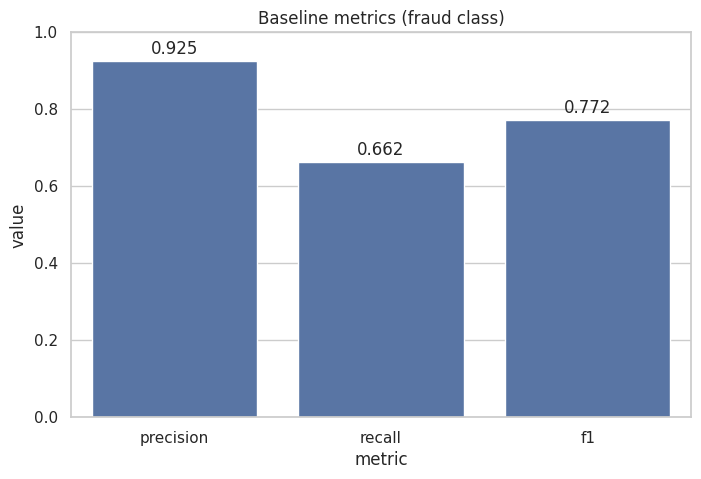

In [50]:
# Visualize metrics relevant to imbalance (bar for precision/recall/f1 for minority)
metrics_df = pd.DataFrame({
    'metric': ['precision', 'recall', 'f1'],
    'value': [precision, recall, f1]
})
sns.barplot(x='metric', y='value', data=metrics_df)
plt.ylim(0,1)
plt.title("Baseline metrics (fraud class)")
for i, v in enumerate(metrics_df['value']):
    plt.text(i, v + 0.02, f"{v:.3f}", ha='center')
plt.show()


#### Baseline Model Performance
Using **Logistic Regression on the imbalanced dataset** (without any resampling), we obtain:

- **Fraud Class (Minority)**  
  - Precision = **0.9245** → When the model predicts fraud, ~92% of those cases are correct.  
  - Recall = **0.6622** → The model catches ~66% of fraud cases, missing about 34%.  
  - F1-score = **0.7717** → Balance between precision and recall.  
  - PR-AUC = **0.7103** → Ranking ability of the model across thresholds.  
  - ROC-AUC = **0.9543** → High, but overly optimistic in imbalanced data.  

- **Non-Fraud Class (Majority)**  
  - Precision = **0.9994**, Recall = **0.9999**, F1-score = **0.9997**.  
  - Metrics are inflated due to class dominance.  

---

#### Key Observations
1. **Accuracy is misleading** → Although test accuracy is **0.9993**, this is dominated by the majority class and hides poor minority performance.  
2. **Fraud recall is moderate** → The model misses ~34% of frauds, which is dangerous in real-world fraud detection.  
3. **Precision is very high** → Few false alarms, which reduces manual review costs.  
4. **F1-score (0.7717)** suggests a decent trade-off, but it can be improved by handling imbalance.  

---

#### 💡 Takeaway
- The **baseline Logistic Regression** is very precise but not sensitive enough, allowing many fraud cases to slip through.  
- For fraud detection, **missing frauds (low recall)** is riskier than raising false alarms.  
- This motivates the use of **resampling methods**, especially **GMM-based synthetic oversampling**, to improve recall while keeping precision at a reasonable level.

## Part B

### Part B1: Theory of GMM-Based Synthetic Sampling

#### 1. The Problem of Class Imbalance
In fraud detection datasets, the minority class (fraud) typically constitutes **less than 1%** of the data.  
This imbalance causes two key issues:  

1. **Classifier bias** — A model trained on such data will be dominated by the majority (non-fraud) class.  
2. **Evaluation distortion** — Accuracy becomes meaningless since >99% accuracy can be achieved by ignoring fraud cases completely.  

---

#### 2. SMOTE: A Classical Oversampling Method
The **Synthetic Minority Oversampling Technique (SMOTE)** creates synthetic samples by **interpolating** between minority class neighbors:  

$$
x_{\text{new}} = x_i + \lambda \cdot (x_j - x_i), \quad \lambda \sim U(0,1)
$$

- \($x_i$, $x_j$\) are nearest neighbors in the minority class.  
- Assumes minority samples lie in a continuous homogeneous region.  

**Limitations of SMOTE**:  
- Cannot capture **multimodality**.  
- May oversample **outliers**.  
- Ignores the **underlying probability distribution**.  

---

#### 3. Gaussian Mixture Models (GMMs)
A **Gaussian Mixture Model (GMM)** assumes that data is generated from a mixture of \(K\) Gaussians:

$$
p(x) = \sum_{k=1}^{K} \pi_k \, \mathcal{N}(x \mid \mu_k, \Sigma_k)
$$

where:  
- \($\pi_k$\) = mixture weight of component \(k\), with \($\sum_k \pi_k = 1$\).  
- \($\mu_k$\) = mean of component \(k\).  
- \($\Sigma_k$\) = covariance matrix of component \(k\).  

Parameters \((\pi_k, \mu_k, \Sigma_k)\) are estimated using **Expectation-Maximization (EM)**:  

- **E-step:** Estimate responsibilities \( \gamma_{ik} \).  
- **M-step:** Update parameters using weighted likelihood.  

---

#### 4. Model Selection
Choosing the number of mixture components \(K\):  

- **AIC (Akaike Information Criterion):**  
$$
\text{AIC} = 2p - 2 \ln(L)
$$

- **BIC (Bayesian Information Criterion):**  
$$
\text{BIC} = p \ln(n) - 2 \ln(L)
$$

where \(p\) = number of parameters, \(n\) = number of samples, and \(L\) = likelihood.  

---

#### 5. Synthetic Sampling with GMM
Steps to generate synthetic fraud samples:  

1. Sample a component index \(k\) according to \(\pi_k\).  
2. Draw a synthetic point \(x_{\text{new}} \sim \mathcal{N}(\mu_k, \Sigma_k)\).  
3. Repeat until the minority class is balanced with the majority.  

---

#### 6. Advantages of GMM-Based Oversampling
- ✅ Captures **sub-clusters** in minority class.  
- ✅ Generates **probabilistically consistent** samples.  
- ✅ Avoids unrealistic interpolation (unlike SMOTE).  
- ✅ Flexible and can be combined with undersampling methods.  

---

#### 💡 Academic Takeaway
Fraud data is **heterogeneous** and cannot be fully modeled by simple interpolation.  
By using **GMM-based synthetic sampling**, we can generate **realistic, multimodal, distribution-aware** fraud samples, improving recall while maintaining reasonable precision.

### 📊 Part B2: GMM Implementation for Synthetic Sampling

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ==========================
# Step 1: Load and prepare data
# ==========================
df = pd.read_csv("creditcard.csv")

X = df.drop("Class", axis=1)
y = df["Class"]

# Train-test split (keep test imbalanced, stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, stratify=y, random_state=42
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Extract minority (fraud) samples for GMM
X_fraud = X_train_scaled[y_train == 1]
print("Minority fraud samples:", X_fraud.shape[0])

Minority fraud samples: 330


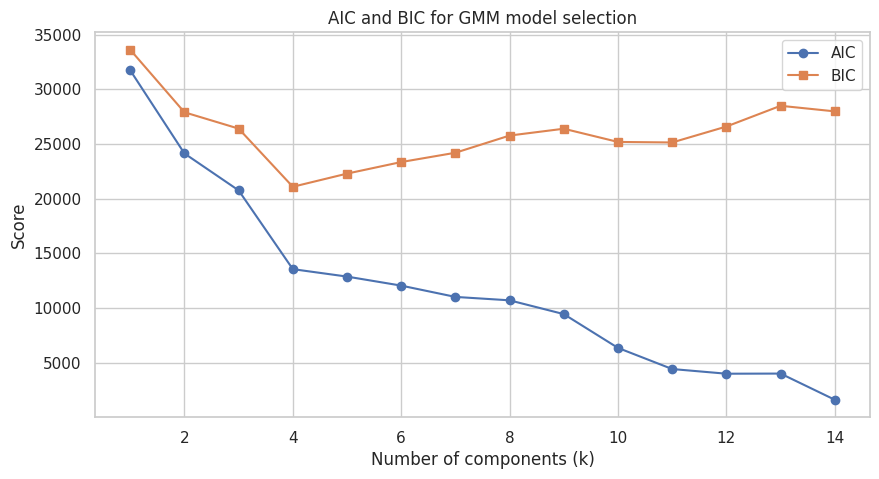

In [52]:
# ==========================
# Step 2: Model selection using AIC and BIC
# ==========================
aic_scores, bic_scores = [], []
k_range = range(1, 15)  # try 1–14 components

for k in k_range:
    gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
    gmm.fit(X_fraud)
    aic_scores.append(gmm.aic(X_fraud))
    bic_scores.append(gmm.bic(X_fraud))

# Plot AIC/BIC
plt.figure(figsize=(10, 5))
plt.plot(k_range, aic_scores, label="AIC", marker="o")
plt.plot(k_range, bic_scores, label="BIC", marker="s")
plt.xlabel("Number of components (k)")
plt.ylabel("Score")
plt.title("AIC and BIC for GMM model selection")
plt.legend()
plt.show()

In [53]:
# ==========================
# Step 3: Fit GMM with chosen k
# ==========================
k_opt = 5  # 🔹 update this based on your AIC/BIC plot
gmm = GaussianMixture(n_components=k_opt, covariance_type='full', random_state=42)
gmm.fit(X_fraud)

print(f"Fitted GMM with {k_opt} components")

Fitted GMM with 5 components


In [54]:
# ==========================
# Step 4: Generate synthetic fraud samples
# ==========================
sample_percent = 0.15
n_fraud = sum(y_train == 1)
n_nonfraud = sum(y_train == 0)
n_to_generate = int((n_nonfraud - n_fraud)*sample_percent)  # balance classes

X_synth, _ = gmm.sample(n_to_generate)  # synthetic frauds

print("Synthetic fraud samples generated:", X_synth.shape[0])

# Combine with original training data
X_train_gmm = np.vstack([X_train_scaled, X_synth])
y_train_gmm = np.concatenate([y_train, np.ones(n_to_generate, dtype=int)])

print("Class distribution after GMM oversampling:")
print(pd.Series(y_train_gmm).value_counts())

Synthetic fraud samples generated: 28524
Class distribution after GMM oversampling:
0    190490
1     28854
Name: count, dtype: int64


In [55]:
X_train_gmm.shape

(219344, 30)

In [56]:
type(X_val_scaled), type(X_test_scaled)

(pandas.core.frame.DataFrame, numpy.ndarray)

In [57]:
def generate_gmm_samples(X_train, y_train, sample_percent, print_split=False):
    sample_percent = 0.15
    n_fraud = sum(y_train == 1)
    n_nonfraud = sum(y_train == 0)
    n_to_generate = int((n_nonfraud - n_fraud)*sample_percent)

    X_synth, _ = gmm.sample(n_to_generate)  # synthetic frauds

    # print("Synthetic fraud samples generated:", X_synth.shape[0])

    # Combine with original training data
    X_train_gmm = np.vstack([X_train, X_synth])
    y_train_gmm = np.concatenate([y_train, np.ones(n_to_generate, dtype=int)])
    
    if print_split:
        print("Class distribution after GMM oversampling:")
        print(pd.Series(y_train_gmm).value_counts())
    
    return (X_train_gmm, y_train_gmm)

In [58]:
(X_train_gmm, y_train_gmm) = generate_gmm_samples(X_train = X_train_scaled, y_train = y_train, sample_percent=0.15)
X_train_gmm.shape

(219344, 30)

In [59]:
X_val_scaled = X_val_scaled.to_numpy()

In [ ]:
n_samples_range = [0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.75, 0.9]
best_n_samples = 0.1; ideal_c = 0.001; prev_best_f1 = 0
for n_samples in n_samples_range:

    (X_train_gmm, y_train_gmm) = generate_gmm_samples(X_train = X_train_scaled, y_train = y_train, sample_percent=n_samples)  # balance 1:n_samples
    c_range = [0.001, 0.0008, 0.0006, 0.0004, 0.0002, 0.0001]
    for c in c_range:
        clf = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42, C=c, penalty='l1')
        clf.fit(X_train_gmm, y_train_gmm)

        y_pred_gmm = clf.predict(X_val_scaled)
        y_proba_gmm = clf.predict_proba(X_val_scaled)[:,1]

        precisions, recalls, f1s, supports = precision_recall_fscore_support(y_val, y_pred_gmm, labels=[1])
        f1_s=f1s[0]; recall_s = recalls[0]

        if f1_s > prev_best_f1 and recall_s > 0.75:
            ideal_c = c
            prev_best_f1 = f1_s
            best_n_samples = n_samples

        print(f"c: {c}, f1: {f1_s}")

print(f"Best c: {ideal_c}, n_samples: {best_n_samples} with f1: {prev_best_f1}")

c: 0.001, f1: 0.6130653266331658
c: 0.0008, f1: 0.6256410256410256
c: 0.0006, f1: 0.6387434554973822
c: 0.0004, f1: 0.6524064171122995
c: 0.0002, f1: 0.6703910614525139
c: 0.0001, f1: 0.659217877094972
c: 0.001, f1: 0.6130653266331658
c: 0.0008, f1: 0.6256410256410256
c: 0.0006, f1: 0.6387434554973822
c: 0.0004, f1: 0.6524064171122995
c: 0.0002, f1: 0.6703910614525139
c: 0.0001, f1: 0.659217877094972
c: 0.001, f1: 0.6130653266331658
c: 0.0008, f1: 0.6256410256410256
c: 0.0006, f1: 0.6387434554973822
c: 0.0004, f1: 0.6524064171122995
c: 0.0002, f1: 0.6703910614525139
c: 0.0001, f1: 0.659217877094972
c: 0.001, f1: 0.6130653266331658
c: 0.0008, f1: 0.6256410256410256
c: 0.0006, f1: 0.6387434554973822
c: 0.0004, f1: 0.6524064171122995
c: 0.0002, f1: 0.6703910614525139
c: 0.0001, f1: 0.659217877094972
c: 0.001, f1: 0.6130653266331658
c: 0.0008, f1: 0.6256410256410256
c: 0.0006, f1: 0.6387434554973822
c: 0.0004, f1: 0.6524064171122995
c: 0.0002, f1: 0.6703910614525139
c: 0.0001, f1: 0.659217

In [61]:
(X_train_gmm, y_train_gmm) = generate_gmm_samples(X_train = X_train_scaled, y_train = y_train, sample_percent=best_n_samples)  # balance 1:n_samples

### Part B3: Logistic Regression on GMM Oversampled Data

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix,
    precision_recall_fscore_support, roc_auc_score,
    average_precision_score
)

# ==========================
# Step 1: Train classifier
# ==========================
# clf = LogisticRegression(max_iter=500, random_state=42, C=)
clf = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42, C=ideal_c, penalty='l1')
clf.fit(X_train_gmm, y_train_gmm)

# ==========================
# Step 2: Evaluate on test set (imbalanced, untouched)
# ==========================
y_pred = clf.predict(X_test_scaled)
y_proba = clf.predict_proba(X_test_scaled)[:,1]

# Confusion matrix
print("Confusion matrix (test set):")
print(confusion_matrix(y_test, y_pred))

# Classification report
print("\nClassification report:")
print(classification_report(y_test, y_pred, target_names=["Non-Fraud", "Fraud"]))

# Focused metrics for fraud class
precisions, recalls, f1s, supports = precision_recall_fscore_support(
    y_test, y_pred, labels=[1], zero_division=0)

precision, recall, f1, support = precisions[0], recalls[0], f1s[0], supports[0]

print(f"Fraud class -> Precision: {precision:.4f}, Recall: {recall:.4f}, "
      f"F1: {f1:.4f}, Support: {support}")

# PR-AUC and ROC-AUC
pr_auc = average_precision_score(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)
print(f"PR-AUC: {pr_auc:.4f}, ROC-AUC: {roc_auc:.4f}")

Confusion matrix (test set):
[[93750    75]
 [   28   134]]

Classification report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     93825
       Fraud       0.64      0.83      0.72       162

    accuracy                           1.00     93987
   macro avg       0.82      0.91      0.86     93987
weighted avg       1.00      1.00      1.00     93987

Fraud class -> Precision: 0.6411, Recall: 0.8272, F1: 0.7224, Support: 162
PR-AUC: 0.6925, ROC-AUC: 0.9670


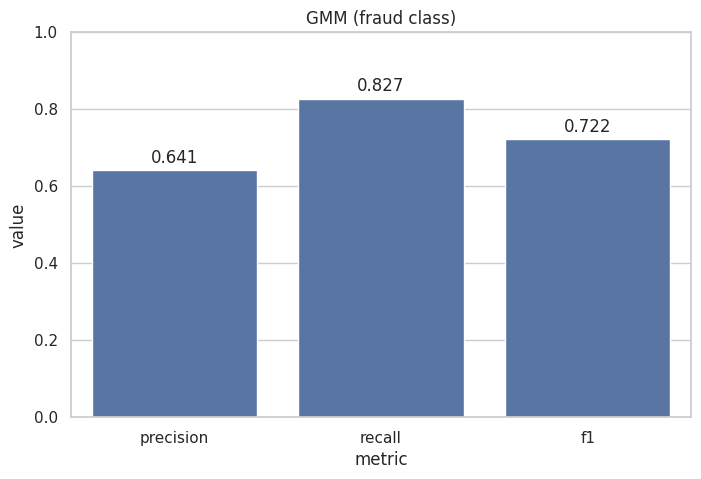

In [63]:
# Visualize metrics relevant to imbalance (bar for precision/recall/f1 for minority)
metrics_df = pd.DataFrame({
    'metric': ['precision', 'recall', 'f1'],
    'value': [precision, recall, f1]
})
sns.barplot(x='metric', y='value', data=metrics_df)
plt.ylim(0,1)
plt.title("GMM (fraud class)")
for i, v in enumerate(metrics_df['value']):
    plt.text(i, v + 0.02, f"{v:.3f}", ha='center')
plt.show()

#### GMM with LBFGS

In [64]:
n_samples_range = [0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.75, 0.9]
best_n_samples = 0.1; ideal_c = 0.001; prev_best_f1 = 0
for n_samples in n_samples_range:

    (X_train_gmm, y_train_gmm) = generate_gmm_samples(X_train = X_train_scaled, y_train = y_train, sample_percent=n_samples)  # balance 1:n_samples
    c_range = [0.001, 0.0008, 0.0006, 0.0004, 0.0002, 0.0001]
    for c in c_range:
        clf = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42, C=c)
        clf.fit(X_train_gmm, y_train_gmm)

        y_pred_gmm = clf.predict(X_val_scaled)
        y_proba_gmm = clf.predict_proba(X_val_scaled)[:,1]

        precisions, recalls, f1s, supports = precision_recall_fscore_support(y_val, y_pred_gmm, labels=[1])
        f1_s=f1s[0]; recall_s = recalls[0]

        if f1_s > prev_best_f1 and recall_s > 0.75:
            ideal_c = c
            prev_best_f1 = f1_s
            best_n_samples = n_samples

        print(f"c: {c}, f1: {f1_s}")

print(f"Best c: {ideal_c}, n_samples: {best_n_samples} with f1: {prev_best_f1}")

c: 0.001, f1: 0.6224489795918368
c: 0.0008, f1: 0.6321243523316062
c: 0.0006, f1: 0.6421052631578947
c: 0.0004, f1: 0.6382978723404256
c: 0.0002, f1: 0.6629834254143646
c: 0.0001, f1: 0.6982248520710059
c: 0.001, f1: 0.6224489795918368
c: 0.0008, f1: 0.6321243523316062
c: 0.0006, f1: 0.6421052631578947
c: 0.0004, f1: 0.6382978723404256
c: 0.0002, f1: 0.6629834254143646
c: 0.0001, f1: 0.6982248520710059
c: 0.001, f1: 0.6224489795918368
c: 0.0008, f1: 0.6321243523316062
c: 0.0006, f1: 0.6421052631578947
c: 0.0004, f1: 0.6382978723404256
c: 0.0002, f1: 0.6629834254143646
c: 0.0001, f1: 0.6982248520710059
c: 0.001, f1: 0.6224489795918368
c: 0.0008, f1: 0.6321243523316062
c: 0.0006, f1: 0.6421052631578947
c: 0.0004, f1: 0.6382978723404256
c: 0.0002, f1: 0.6629834254143646
c: 0.0001, f1: 0.6982248520710059
c: 0.001, f1: 0.6224489795918368
c: 0.0008, f1: 0.6321243523316062
c: 0.0006, f1: 0.6421052631578947
c: 0.0004, f1: 0.6382978723404256
c: 0.0002, f1: 0.6629834254143646
c: 0.0001, f1: 0.69

In [65]:
(X_train_gmm, y_train_gmm) = generate_gmm_samples(X_train = X_train_scaled, y_train = y_train, sample_percent=best_n_samples)  # balance 1:n_samples

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix,
    precision_recall_fscore_support, roc_auc_score,
    average_precision_score
)

# ==========================
# Step 1: Train classifier
# ==========================
# clf = LogisticRegression(max_iter=500, random_state=42, C=)
clf = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42, C=ideal_c)
clf.fit(X_train_gmm, y_train_gmm)

# ==========================
# Step 2: Evaluate on test set (imbalanced, untouched)
# ==========================
y_pred = clf.predict(X_test_scaled)
y_proba = clf.predict_proba(X_test_scaled)[:,1]

# Confusion matrix
print("Confusion matrix (test set):")
print(confusion_matrix(y_test, y_pred))

# Classification report
print("\nClassification report:")
print(classification_report(y_test, y_pred, target_names=["Non-Fraud", "Fraud"]))

# Focused metrics for fraud class
precisions, recalls, f1s, supports = precision_recall_fscore_support(
    y_test, y_pred, labels=[1], zero_division=0)

precision, recall, f1, support = precisions[0], recalls[0], f1s[0], supports[0]

print(f"Fraud class -> Precision: {precision:.4f}, Recall: {recall:.4f}, "
      f"F1: {f1:.4f}, Support: {support}")

# PR-AUC and ROC-AUC
pr_auc = average_precision_score(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)
print(f"PR-AUC: {pr_auc:.4f}, ROC-AUC: {roc_auc:.4f}")

Confusion matrix (test set):
[[93762    63]
 [   30   132]]

Classification report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     93825
       Fraud       0.68      0.81      0.74       162

    accuracy                           1.00     93987
   macro avg       0.84      0.91      0.87     93987
weighted avg       1.00      1.00      1.00     93987

Fraud class -> Precision: 0.6769, Recall: 0.8148, F1: 0.7395, Support: 162
PR-AUC: 0.7067, ROC-AUC: 0.9769


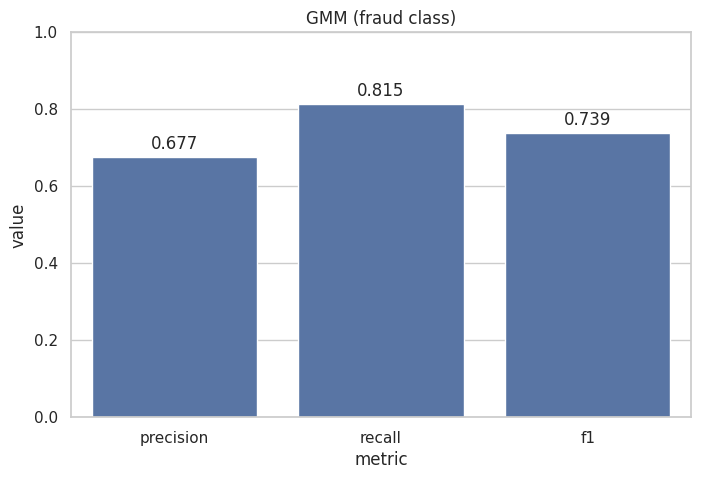

In [67]:
# Visualize metrics relevant to imbalance (bar for precision/recall/f1 for minority)
metrics_df = pd.DataFrame({
    'metric': ['precision', 'recall', 'f1'],
    'value': [precision, recall, f1]
})
sns.barplot(x='metric', y='value', data=metrics_df)
plt.ylim(0,1)
plt.title("GMM (fraud class)")
for i, v in enumerate(metrics_df['value']):
    plt.text(i, v + 0.02, f"{v:.3f}", ha='center')
plt.show()

### Part B4: GMM + CBU

Majority class (non-fraud) samples in training set: 190490


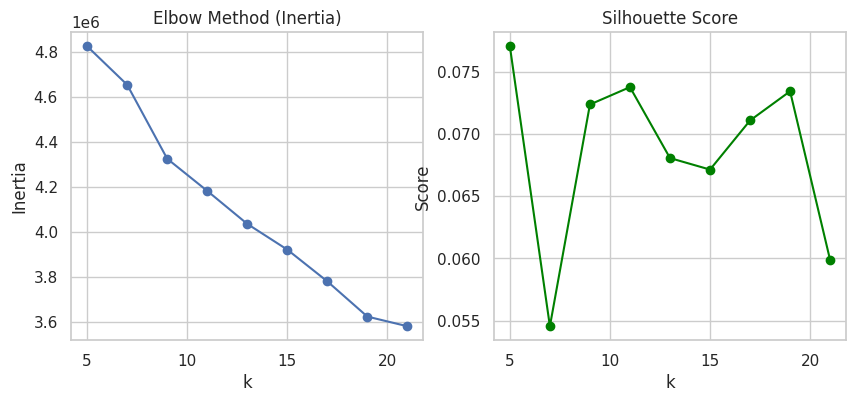

In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Extract majority class (non-fraud) samples from training set
X_maj = X_train_scaled[y_train == 0]
print("Majority class (non-fraud) samples in training set:", X_maj.shape[0])

# Choose number of clusters for majority class (Elbow method)
inertias = []
sil_scores = []
K_range = range(5, 22, 2)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE)
    labels = kmeans.fit_predict(X_maj)
    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_maj, labels, sample_size=5000, random_state=RANDOM_STATE))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(K_range, inertias, marker='o')
plt.title("Elbow Method (Inertia)")
plt.xlabel("k"); plt.ylabel("Inertia")

plt.subplot(1,2,2)
plt.plot(K_range, sil_scores, marker='o', color='green')
plt.title("Silhouette Score")
plt.xlabel("k"); plt.ylabel("Score")
plt.show()

In [37]:
# Cluster majority samples using chosen k
k_opt_maj = 11   # <-- adjust based on plots above
kmeans_maj = KMeans(n_clusters=k_opt_maj, random_state=RANDOM_STATE)
maj_labels = kmeans_maj.fit_predict(X_maj)

pd.Series(maj_labels).value_counts().sort_index()

0     13006
1     43306
2     19297
3     38383
4      4386
5     10447
6     25114
7     35094
8       275
9       304
10      878
Name: count, dtype: int64

In [38]:
from sklearn.utils import resample

def generate_gmm_cbu_samples(X_train, y_train, n_clusters=5, sample_percent=0.3, print_split=False, multiplier=1):
    """
    Hybrid GMM oversampling + CBU undersampling.
    
    Steps:
      1. Oversample fraud with GMM (controlled by sample_percent).
      2. Cluster non-fraud samples.
      3. Undersample each cluster to balance with enlarged fraud set.
    """
    # ---------------------------
    # Step 1: Separate fraud / non-fraud
    # ---------------------------
    X_nonfraud = X_train[y_train == 0]
    X_fraud = X_train[y_train == 1]

    # ---------------------------
    # Step 2: Oversample minority (fraud) using GMM
    # ---------------------------
    n_fraud = len(X_fraud)
    n_nonfraud = len(X_nonfraud)
    # n_to_generate = int(n_fraud * sample_percent)
    n_to_generate = int((n_nonfraud - n_fraud)*sample_percent)


    X_synth, _ = gmm.sample(n_to_generate)  # synthetic frauds
    new_X_fraud = np.vstack([X_fraud, X_synth])
    new_y_fraud = np.ones(new_X_fraud.shape[0], dtype=int)

    # ---------------------------
    # Step 3: Apply Clustering-Based Undersampling (CBU) on majority
    # ---------------------------
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X_nonfraud)

    per_cluster_target = len(new_X_fraud)*multiplier // n_clusters  # balance per cluster

    X_nonfraud_cbu, y_nonfraud_cbu = [], []
    for c in range(n_clusters):
        cluster_idx = np.where(clusters == c)[0]
        cluster_samples = X_nonfraud[cluster_idx]

        # Undersample majority cluster
        if len(cluster_samples) > per_cluster_target:
            cluster_resampled = resample(cluster_samples,
                                         n_samples=per_cluster_target,
                                         random_state=42,
                                         replace=False)
        else:
            cluster_resampled = cluster_samples

        X_nonfraud_cbu.append(cluster_resampled)
        y_nonfraud_cbu.append(np.zeros(cluster_resampled.shape[0], dtype=int))

    X_nonfraud_cbu = np.vstack(X_nonfraud_cbu)
    y_nonfraud_cbu = np.concatenate(y_nonfraud_cbu)

    # ---------------------------
    # Step 4: Combine fraud + non-fraud
    # ---------------------------
    X_combined = np.vstack([X_nonfraud_cbu, new_X_fraud])
    y_combined = np.concatenate([y_nonfraud_cbu, new_y_fraud])

    if print_split:
        print("Hybrid dataset distribution:")
        print(pd.Series(y_combined).value_counts())

    return X_combined, y_combined

In [39]:
multiplier = [1, 2, 3, 4, 5, 6, 7, 8]
n_samples_range = [0.05, 0.07, 0.1, 0.12, 0.15, 0.18, 0.2, 0.25, 0.3]
best_n_samples = 0.1; ideal_c = 0.001; best_multiplier=1; prev_best_f1 = 0
for mul in multiplier:
    for n_samples in n_samples_range:

        (X_train_gmm, y_train_gmm) = generate_gmm_cbu_samples(X_train = X_train_scaled, y_train = y_train, n_clusters=k_opt_maj, sample_percent=n_samples, multiplier=mul)  # balance 1:1

        c_range = [0.001, 0.0008, 0.0006, 0.0004, 0.0002, 0.0001]
        for c in c_range:
            clf = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42, C=c, penalty='l1')
            clf.fit(X_train_gmm, y_train_gmm)

            y_pred_gmm = clf.predict(X_val_scaled)
            y_proba_gmm = clf.predict_proba(X_val_scaled)[:,1]

            precisions, recalls, f1s, supports = precision_recall_fscore_support(y_val, y_pred_gmm, labels=[1])
            f1_s=f1s[0]; recall_s = recalls[0]

            if f1_s > prev_best_f1 and recall_s > 0.75:
                ideal_c = c
                best_multiplier = mul
                prev_best_f1 = f1_s
                best_n_samples = n_samples

            print(f"c: {c}, f1: {f1_s}")

print(f"Best c: {ideal_c}, n_samples: {best_n_samples}, multiplier: {best_multiplier} with f1: {prev_best_f1}")

c: 0.001, f1: 0.12563323201621074
c: 0.0008, f1: 0.10420168067226891
c: 0.0006, f1: 0.05344827586206897
c: 0.0004, f1: 0.011740041928721174
c: 0.0002, f1: 0.007106198183971575
c: 0.0001, f1: 0.0067897102419431955
c: 0.001, f1: 0.14219114219114218
c: 0.0008, f1: 0.1288981288981289
c: 0.0006, f1: 0.10290456431535269
c: 0.0004, f1: 0.03773584905660377
c: 0.0002, f1: 0.007061246506154073
c: 0.0001, f1: 0.006779984721161192
c: 0.001, f1: 0.145933014354067
c: 0.0008, f1: 0.14055299539170507
c: 0.0006, f1: 0.12796697626418987
c: 0.0004, f1: 0.09143686502177069
c: 0.0002, f1: 0.008710379869344302
c: 0.0001, f1: 0.0068506184586108465
c: 0.001, f1: 0.1478787878787879
c: 0.0008, f1: 0.14285714285714285
c: 0.0006, f1: 0.1337719298245614
c: 0.0004, f1: 0.10570469798657718
c: 0.0002, f1: 0.017753866845998657
c: 0.0001, f1: 0.0068496408695238545
c: 0.001, f1: 0.14859926918392205
c: 0.0008, f1: 0.1450653983353151
c: 0.0006, f1: 0.13847900113507378
c: 0.0004, f1: 0.12292682926829268
c: 0.0002, f1: 0.04

In [40]:
X_train_hybrid, y_train_hybrid = generate_gmm_cbu_samples(
    X_train_scaled, y_train, n_clusters=k_opt_maj, sample_percent=best_n_samples, print_split=True, multiplier=best_multiplier)

clf_hybrid = LogisticRegression(solver='liblinear', max_iter=500, random_state=42, C=ideal_c, penalty='l1')
clf_hybrid.fit(X_train_hybrid, y_train_hybrid)

y_pred_hybrid = clf_hybrid.predict(X_test_scaled)
y_proba_hybrid = clf_hybrid.predict_proba(X_test_scaled)[:,1]

print("Confusion matrix (Hybrid GMM+CBU):")
print(confusion_matrix(y_test, y_pred_hybrid))

print("\nClassification report:")
print(classification_report(y_test, y_pred_hybrid, target_names=["Non-Fraud", "Fraud"]))

# Focused metrics for fraud class
precisions, recalls, f1s, supports = precision_recall_fscore_support(
    y_test, y_pred_hybrid, labels=[1], zero_division=0)

precision, recall, f1, support = precisions[0], recalls[0], f1s[0], supports[0]

print(f"Fraud class -> Precision: {precision:.4f}, Recall: {recall:.4f}, "
      f"F1: {f1:.4f}, Support: {support}")

# PR-AUC and ROC-AUC
pr_auc = average_precision_score(y_test, y_proba_hybrid)
roc_auc = roc_auc_score(y_test, y_proba_hybrid)
print(f"PR-AUC: {pr_auc:.4f}, ROC-AUC: {roc_auc:.4f}")

Hybrid dataset distribution:
0    55921
1     9838
Name: count, dtype: int64
Confusion matrix (Hybrid GMM+CBU):
[[93761    64]
 [   30   132]]

Classification report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     93825
       Fraud       0.67      0.81      0.74       162

    accuracy                           1.00     93987
   macro avg       0.84      0.91      0.87     93987
weighted avg       1.00      1.00      1.00     93987

Fraud class -> Precision: 0.6735, Recall: 0.8148, F1: 0.7374, Support: 162
PR-AUC: 0.6997, ROC-AUC: 0.9637


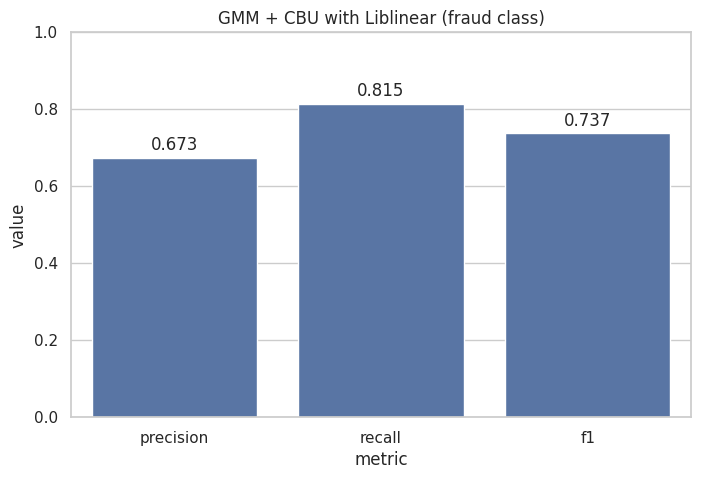

In [41]:
# Visualize metrics relevant to imbalance (bar for precision/recall/f1 for minority)
metrics_df = pd.DataFrame({
    'metric': ['precision', 'recall', 'f1'],
    'value': [precision, recall, f1]
})
sns.barplot(x='metric', y='value', data=metrics_df)
plt.ylim(0,1)
plt.title("GMM + CBU with Liblinear (fraud class)")
for i, v in enumerate(metrics_df['value']):
    plt.text(i, v + 0.02, f"{v:.3f}", ha='center')
plt.show()

#### GMM + CBU with LBFGS

In [42]:
from sklearn.utils import resample

def generate_gmm_cbu_samples(X_train, y_train, n_clusters=5, sample_percent=0.3, print_split=False, multiplier=1):
    """
    Hybrid GMM oversampling + CBU undersampling.
    
    Steps:
      1. Oversample fraud with GMM (controlled by sample_percent).
      2. Cluster non-fraud samples.
      3. Undersample each cluster to balance with enlarged fraud set.
    """
    # ---------------------------
    # Step 1: Separate fraud / non-fraud
    # ---------------------------
    X_nonfraud = X_train[y_train == 0]
    X_fraud = X_train[y_train == 1]

    # ---------------------------
    # Step 2: Oversample minority (fraud) using GMM
    # ---------------------------
    n_fraud = len(X_fraud)
    n_nonfraud = len(X_nonfraud)
    # n_to_generate = int(n_fraud * sample_percent)
    n_to_generate = int((n_nonfraud - n_fraud)*sample_percent)


    X_synth, _ = gmm.sample(n_to_generate)  # synthetic frauds
    new_X_fraud = np.vstack([X_fraud, X_synth])
    new_y_fraud = np.ones(new_X_fraud.shape[0], dtype=int)

    # ---------------------------
    # Step 3: Apply Clustering-Based Undersampling (CBU) on majority
    # ---------------------------
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X_nonfraud)

    per_cluster_target = len(new_X_fraud)*multiplier // n_clusters  # balance per cluster

    X_nonfraud_cbu, y_nonfraud_cbu = [], []
    for c in range(n_clusters):
        cluster_idx = np.where(clusters == c)[0]
        cluster_samples = X_nonfraud[cluster_idx]

        # Undersample majority cluster
        if len(cluster_samples) > per_cluster_target:
            cluster_resampled = resample(cluster_samples,
                                         n_samples=per_cluster_target,
                                         random_state=42,
                                         replace=False)
        else:
            cluster_resampled = cluster_samples

        X_nonfraud_cbu.append(cluster_resampled)
        y_nonfraud_cbu.append(np.zeros(cluster_resampled.shape[0], dtype=int))

    X_nonfraud_cbu = np.vstack(X_nonfraud_cbu)
    y_nonfraud_cbu = np.concatenate(y_nonfraud_cbu)

    # ---------------------------
    # Step 4: Combine fraud + non-fraud
    # ---------------------------
    X_combined = np.vstack([X_nonfraud_cbu, new_X_fraud])
    y_combined = np.concatenate([y_nonfraud_cbu, new_y_fraud])

    if print_split:
        print("Hybrid dataset distribution:")
        print(pd.Series(y_combined).value_counts())

    return X_combined, y_combined

In [43]:
multiplier = [1, 2, 3, 4, 5, 6, 7, 8]
n_samples_range = [0.05, 0.07, 0.1, 0.12, 0.15, 0.18, 0.2, 0.25, 0.3]
best_n_samples = 0.1; ideal_c = 0.001; best_multiplier=1; prev_best_f1 = 0
for mul in multiplier:
    for n_samples in n_samples_range:

        (X_train_gmm, y_train_gmm) = generate_gmm_cbu_samples(X_train = X_train_scaled, y_train = y_train, n_clusters=k_opt_maj, sample_percent=n_samples, multiplier=mul)  # balance 1:1

        c_range = [0.001, 0.0008, 0.0006, 0.0004, 0.0002, 0.0001]
        for c in c_range:
            clf = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42, C=c)
            clf.fit(X_train_gmm, y_train_gmm)

            y_pred_gmm = clf.predict(X_val_scaled)
            y_proba_gmm = clf.predict_proba(X_val_scaled)[:,1]

            precisions, recalls, f1s, supports = precision_recall_fscore_support(y_val, y_pred_gmm, labels=[1])
            f1_s=f1s[0]; recall_s = recalls[0]

            if f1_s > prev_best_f1 and recall_s > 0.75:
                ideal_c = c
                best_multiplier = mul
                prev_best_f1 = f1_s
                best_n_samples = n_samples

            print(f"c: {c}, f1: {f1_s}")

print(f"Best c: {ideal_c}, n_samples: {best_n_samples}, multiplier: {best_multiplier} with f1: {prev_best_f1}")

c: 0.001, f1: 0.23416506717850288
c: 0.0008, f1: 0.24497991967871485
c: 0.0006, f1: 0.25684210526315787
c: 0.0004, f1: 0.27293064876957496
c: 0.0002, f1: 0.3288409703504043
c: 0.0001, f1: 0.6349206349206349
c: 0.001, f1: 0.21291448516579406
c: 0.0008, f1: 0.22509225092250923
c: 0.0006, f1: 0.24015748031496062
c: 0.0004, f1: 0.25684210526315787
c: 0.0002, f1: 0.28306264501160094
c: 0.0001, f1: 0.47843137254901963
c: 0.001, f1: 0.19488817891373802
c: 0.0008, f1: 0.20783645655877342
c: 0.0006, f1: 0.22262773722627738
c: 0.0004, f1: 0.24448897795591182
c: 0.0002, f1: 0.2663755458515284
c: 0.0001, f1: 0.3193717277486911
c: 0.001, f1: 0.1831831831831832
c: 0.0008, f1: 0.1955128205128205
c: 0.0006, f1: 0.2089041095890411
c: 0.0004, f1: 0.22846441947565543
c: 0.0002, f1: 0.26180257510729615
c: 0.0001, f1: 0.2975609756097561
c: 0.001, f1: 0.17039106145251395
c: 0.0008, f1: 0.1831831831831832
c: 0.0006, f1: 0.2
c: 0.0004, f1: 0.22385321100917432
c: 0.0002, f1: 0.2525879917184265
c: 0.0001, f1: 0

In [44]:
X_train_hybrid, y_train_hybrid = generate_gmm_cbu_samples(
    X_train_scaled, y_train, n_clusters=k_opt_maj, sample_percent=best_n_samples, print_split=True, multiplier=best_multiplier)

clf_hybrid = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42, C=ideal_c)
clf_hybrid.fit(X_train_hybrid, y_train_hybrid)

y_pred_hybrid = clf_hybrid.predict(X_test_scaled)
y_proba_hybrid = clf_hybrid.predict_proba(X_test_scaled)[:,1]

print("Confusion matrix (Hybrid GMM+CBU):")
print(confusion_matrix(y_test, y_pred_hybrid))

print("\nClassification report:")
print(classification_report(y_test, y_pred_hybrid, target_names=["Non-Fraud", "Fraud"]))

# Focused metrics for fraud class
precisions, recalls, f1s, supports = precision_recall_fscore_support(
    y_test, y_pred_hybrid, labels=[1], zero_division=0)

precision, recall, f1, support = precisions[0], recalls[0], f1s[0], supports[0]

print(f"Fraud class -> Precision: {precision:.4f}, Recall: {recall:.4f}, "
      f"F1: {f1:.4f}, Support: {support}")

# PR-AUC and ROC-AUC
pr_auc = average_precision_score(y_test, y_proba_hybrid)
roc_auc = roc_auc_score(y_test, y_proba_hybrid)
print(f"PR-AUC: {pr_auc:.4f}, ROC-AUC: {roc_auc:.4f}")

Hybrid dataset distribution:
0    49663
1     9838
Name: count, dtype: int64
Confusion matrix (Hybrid GMM+CBU):
[[93784    41]
 [   31   131]]

Classification report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     93825
       Fraud       0.76      0.81      0.78       162

    accuracy                           1.00     93987
   macro avg       0.88      0.90      0.89     93987
weighted avg       1.00      1.00      1.00     93987

Fraud class -> Precision: 0.7616, Recall: 0.8086, F1: 0.7844, Support: 162
PR-AUC: 0.7109, ROC-AUC: 0.9733


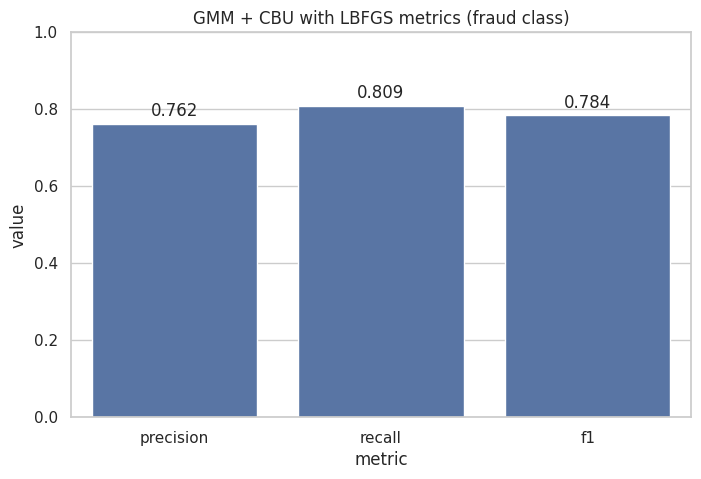

In [45]:
# Visualize metrics relevant to imbalance (bar for precision/recall/f1 for minority)
metrics_df = pd.DataFrame({
    'metric': ['precision', 'recall', 'f1'],
    'value': [precision, recall, f1]
})
sns.barplot(x='metric', y='value', data=metrics_df)
plt.ylim(0,1)
plt.title("GMM + CBU with LBFGS metrics (fraud class)")
for i, v in enumerate(metrics_df['value']):
    plt.text(i, v + 0.02, f"{v:.3f}", ha='center')
plt.show()

### CBO + CBU

Majority class (non-fraud) samples in training set: 190490


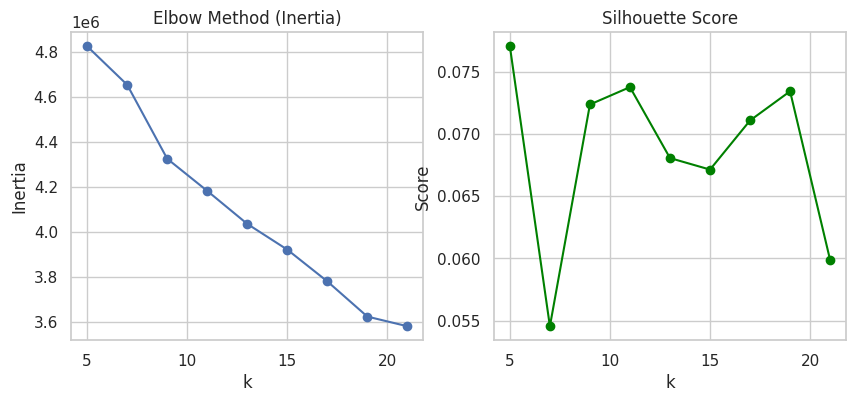

In [68]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Extract majority class (non-fraud) samples from training set
X_maj = X_train_scaled[y_train == 0]
print("Majority class (non-fraud) samples in training set:", X_maj.shape[0])

# Choose number of clusters for majority class (Elbow method)
inertias = []
sil_scores = []
K_range = range(5, 22, 2)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE)
    labels = kmeans.fit_predict(X_maj)
    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_maj, labels, sample_size=5000, random_state=RANDOM_STATE))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(K_range, inertias, marker='o')
plt.title("Elbow Method (Inertia)")
plt.xlabel("k"); plt.ylabel("Inertia")

plt.subplot(1,2,2)
plt.plot(K_range, sil_scores, marker='o', color='green')
plt.title("Silhouette Score")
plt.xlabel("k"); plt.ylabel("Score")
plt.show()

In [69]:
# Cluster majority samples using chosen k
k_opt_maj = 11   # <-- adjust based on plots above
kmeans_maj = KMeans(n_clusters=k_opt_maj, random_state=RANDOM_STATE)
maj_labels = kmeans_maj.fit_predict(X_maj)

pd.Series(maj_labels).value_counts().sort_index()

0     13006
1     43306
2     19297
3     38383
4      4386
5     10447
6     25114
7     35094
8       275
9       304
10      878
Name: count, dtype: int64

Minority class (fraud) samples in training set: 330


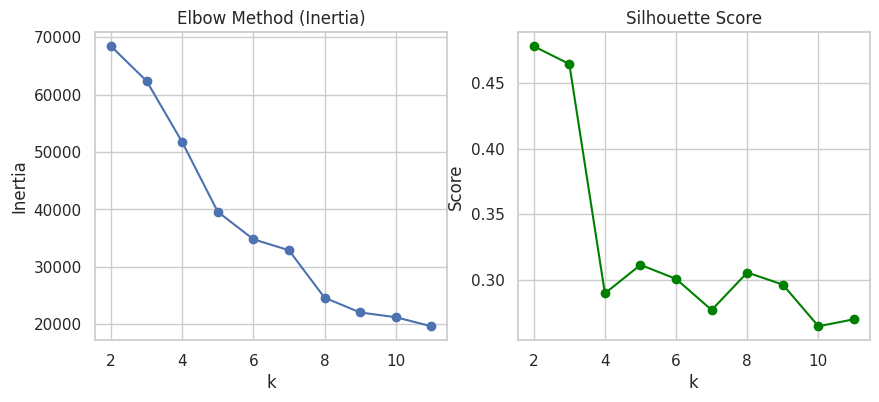

In [70]:
# Choose number of clusters for minority class (Elbow method)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Extract minority class (fraud) samples from training set
X_min = X_train_scaled[y_train == 1]
print("Minority class (fraud) samples in training set:", X_min.shape[0])

inertias = []
sil_scores = []
K_range = range(2, 12)  # try 2–7 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE)
    labels = kmeans.fit_predict(X_min)
    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_min, labels))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(K_range, inertias, marker='o')
plt.title("Elbow Method (Inertia)")
plt.xlabel("k"); plt.ylabel("Inertia")

plt.subplot(1,2,2)
plt.plot(K_range, sil_scores, marker='o', color='green')
plt.title("Silhouette Score")
plt.xlabel("k"); plt.ylabel("Score")
plt.show()

In [71]:
# Cluster minority samples using chosen k
k_opt_min = 8  # <-- adjust based on the plots above
kmeans_min = KMeans(n_clusters=k_opt_min, random_state=RANDOM_STATE)
min_labels = kmeans_min.fit_predict(X_min)

pd.Series(min_labels).value_counts().sort_index()

0     59
1    101
2     36
3     12
4      3
5      6
6     47
7     66
Name: count, dtype: int64

In [72]:
def cbo_cbu(
    X_train, 
    y_train, 
    k_opt,                  # clusters for fraud (CBO oversampling)
    n_clusters=5,           # clusters for non-fraud (CBU undersampling)
    sample_percent=0.3,     # how much to oversample fraud (relative to existing fraud count)
    multiplier=1.0,         # multiplier relative to majority size for final fraud target
    random_state=42, 
    print_split=False
):
    """
    Hybrid CBO (fraud oversampling) + CBU (non-fraud undersampling).

    Parameters
    ----------
    X_train, y_train : ndarray
        Training data and labels
    k_opt : int
        Number of clusters for minority class (CBO oversampling)
    n_clusters : int, default=5
        Number of clusters for majority class (CBU undersampling)
    sample_percent : float, default=0.3
        Oversampling ratio relative to fraud count (extra frauds added)
    multiplier : float, default=1.0
        Multiplier relative to majority size for final fraud target
    random_state : int, default=42
        Random seed
    print_split : bool, default=False
        Whether to print class distribution after resampling

    Returns
    -------
    X_combined, y_combined : ndarray
        Resampled training data (fraud oversampled + non-fraud undersampled)
    """
    from sklearn.cluster import KMeans
    from sklearn.utils import resample

    # ---------------------------
    # Step 1: Split fraud / non-fraud
    # ---------------------------
    X_nonfraud = X_train[y_train == 0]
    X_fraud = X_train[y_train == 1]

    n_fraud = len(X_fraud)
    n_nonfraud = len(X_nonfraud)

    # ---------------------------
    # Step 2: Compute oversampling target (fraud)
    # ---------------------------
    # Extra frauds based on sample_percent
    n_to_generate = int(n_fraud * sample_percent)
    # Target fraud size relative to majority
    target_minority_total = int(n_nonfraud * multiplier)

    # Final fraud count (original + synthetic)
    total_fraud_size = n_fraud + n_to_generate
    if total_fraud_size > target_minority_total:
        total_fraud_size = target_minority_total

    # ---------------------------
    # Step 3: Apply CBO (cluster-based oversampling of fraud)
    # ---------------------------
    kmeans_fraud = KMeans(n_clusters=k_opt, random_state=random_state)
    min_labels = kmeans_fraud.fit_predict(X_fraud)

    per_cluster_target = total_fraud_size // k_opt

    X_resampled_list, y_resampled_list = [], []
    for c in range(k_opt):
        X_cluster = X_fraud[min_labels == c]
        y_cluster = np.ones(len(X_cluster), dtype=int)

        if len(X_cluster) == 0:
            continue

        X_cluster_res, y_cluster_res = resample(
            X_cluster,
            y_cluster,
            replace=True,
            n_samples=per_cluster_target,
            random_state=random_state
        )

        X_resampled_list.append(X_cluster_res)
        y_resampled_list.append(y_cluster_res)

    X_fraud_cbo = np.vstack(X_resampled_list)
    y_fraud_cbo = np.concatenate(y_resampled_list)

    # ---------------------------
    # Step 4: Apply CBU (undersample majority relative to new fraud size)
    # ---------------------------
    kmeans_nonfraud = KMeans(n_clusters=n_clusters, random_state=random_state)
    clusters = kmeans_nonfraud.fit_predict(X_nonfraud)

    per_cluster_target = len(X_fraud_cbo) // n_clusters

    X_nonfraud_cbu, y_nonfraud_cbu = [], []
    for c in range(n_clusters):
        cluster_idx = np.where(clusters == c)[0]
        cluster_samples = X_nonfraud[cluster_idx]

        if len(cluster_samples) > per_cluster_target:
            cluster_resampled = resample(cluster_samples,
                                         n_samples=per_cluster_target,
                                         random_state=random_state,
                                         replace=False)
        else:
            cluster_resampled = cluster_samples

        X_nonfraud_cbu.append(cluster_resampled)
        y_nonfraud_cbu.append(np.zeros(cluster_resampled.shape[0], dtype=int))

    X_nonfraud_cbu = np.vstack(X_nonfraud_cbu)
    y_nonfraud_cbu = np.concatenate(y_nonfraud_cbu)

    # ---------------------------
    # Step 5: Merge fraud + non-fraud
    # ---------------------------
    X_combined = np.vstack([X_nonfraud_cbu, X_fraud_cbo])
    y_combined = np.concatenate([y_nonfraud_cbu, y_fraud_cbo])

    if print_split:
        print("Hybrid dataset distribution:")
        print(pd.Series(y_combined).value_counts())

    return X_combined, y_combined

In [73]:
multiplier = [1, 2, 3, 4, 5, 6, 7, 8]
n_samples_range = [0.05, 0.07, 0.1, 0.12, 0.15, 0.18, 0.2, 0.25, 0.3]
best_n_samples = 0.1; ideal_c = 0.001; best_multiplier=1; prev_best_f1 = 0
for mul in multiplier:
    for n_samples in n_samples_range:

        (X_train_gmm, y_train_gmm) = cbo_cbu(X_train = X_train_scaled, y_train = y_train, n_clusters=k_opt_maj, k_opt=k_opt_min, sample_percent=n_samples, multiplier=mul)  # balance 1:1

        c_range = [0.001, 0.0008, 0.0006, 0.0004, 0.0002, 0.0001]
        for c in c_range:
            clf = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42, C=c)
            clf.fit(X_train_gmm, y_train_gmm)

            y_pred_gmm = clf.predict(X_val_scaled)
            y_proba_gmm = clf.predict_proba(X_val_scaled)[:,1]

            precisions, recalls, f1s, supports = precision_recall_fscore_support(y_val, y_pred_gmm, labels=[1])
            f1_s=f1s[0]; recall_s = recalls[0]

            if f1_s > prev_best_f1 and recall_s > 0.75:
                ideal_c = c
                best_multiplier = mul
                prev_best_f1 = f1_s
                best_n_samples = n_samples

            print(f"c: {c}, f1: {f1_s}")

print(f"Best c: {ideal_c}, n_samples: {best_n_samples}, multiplier: {best_multiplier} with f1: {prev_best_f1}")

c: 0.001, f1: 0.7402597402597403
c: 0.0008, f1: 0.7320261437908496
c: 0.0006, f1: 0.7534246575342466
c: 0.0004, f1: 0.7586206896551724
c: 0.0002, f1: 0.7586206896551724
c: 0.0001, f1: 0.7391304347826086
c: 0.001, f1: 0.7402597402597403
c: 0.0008, f1: 0.7320261437908496
c: 0.0006, f1: 0.7534246575342466
c: 0.0004, f1: 0.7586206896551724
c: 0.0002, f1: 0.7638888888888888
c: 0.0001, f1: 0.7299270072992701
c: 0.001, f1: 0.7402597402597403
c: 0.0008, f1: 0.7320261437908496
c: 0.0006, f1: 0.7534246575342466
c: 0.0004, f1: 0.7586206896551724
c: 0.0002, f1: 0.7586206896551724
c: 0.0001, f1: 0.7571428571428571
c: 0.001, f1: 0.7402597402597403
c: 0.0008, f1: 0.7417218543046358
c: 0.0006, f1: 0.7534246575342466
c: 0.0004, f1: 0.7586206896551724
c: 0.0002, f1: 0.7586206896551724
c: 0.0001, f1: 0.7482014388489209
c: 0.001, f1: 0.7402597402597403
c: 0.0008, f1: 0.7320261437908496
c: 0.0006, f1: 0.7534246575342466
c: 0.0004, f1: 0.7586206896551724
c: 0.0002, f1: 0.7586206896551724
c: 0.0001, f1: 0.74

In [74]:
# Generate CBO + CBU dataset
X_train_hybrid, y_train_hybrid = cbo_cbu(
    X_train_scaled, y_train,
    k_opt=k_opt_min,                 # fraud clusters for CBO
    n_clusters=k_opt_maj,            # non-fraud clusters for CBU
    sample_percent=best_n_samples,      # oversample fraud relative to fraud count
    multiplier=best_multiplier,          # fraud target relative to majority
    random_state=42,
    print_split=True
)

# Train classifier
clf_hybrid = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42, C=ideal_c)
clf_hybrid.fit(X_train_hybrid, y_train_hybrid)

y_pred_hybrid = clf_hybrid.predict(X_test_scaled)
y_proba_hybrid = clf_hybrid.predict_proba(X_test_scaled)[:,1]

print("Confusion matrix (Hybrid GMM+CBU):")
print(confusion_matrix(y_test, y_pred_hybrid))

print("\nClassification report:")
print(classification_report(y_test, y_pred_hybrid, target_names=["Non-Fraud", "Fraud"]))

# Focused metrics for fraud class
precisions, recalls, f1s, supports = precision_recall_fscore_support(
    y_test, y_pred_hybrid, labels=[1], zero_division=0)

precision, recall, f1, support = precisions[0], recalls[0], f1s[0], supports[0]

print(f"Fraud class -> Precision: {precision:.4f}, Recall: {recall:.4f}, "
      f"F1: {f1:.4f}, Support: {support}")

# PR-AUC and ROC-AUC
pr_auc = average_precision_score(y_test, y_proba_hybrid)
roc_auc = roc_auc_score(y_test, y_proba_hybrid)
print(f"PR-AUC: {pr_auc:.4f}, ROC-AUC: {roc_auc:.4f}")

Hybrid dataset distribution:
1    424
0    418
Name: count, dtype: int64
Confusion matrix (Hybrid GMM+CBU):
[[93796    29]
 [   34   128]]

Classification report:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     93825
       Fraud       0.82      0.79      0.80       162

    accuracy                           1.00     93987
   macro avg       0.91      0.89      0.90     93987
weighted avg       1.00      1.00      1.00     93987

Fraud class -> Precision: 0.8153, Recall: 0.7901, F1: 0.8025, Support: 162
PR-AUC: 0.7075, ROC-AUC: 0.9496


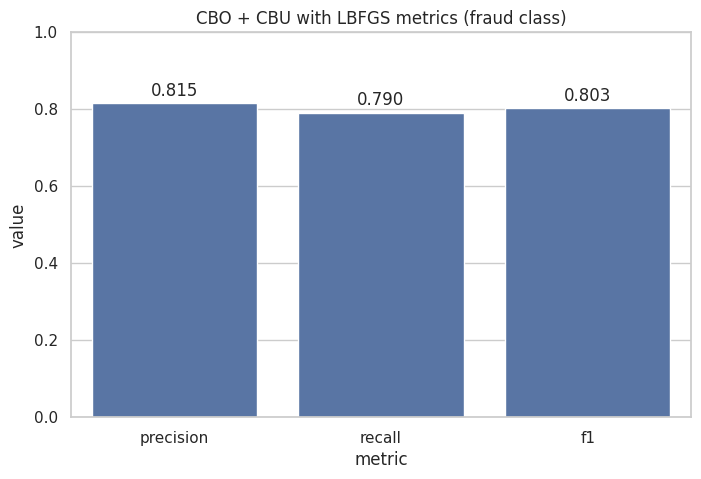

In [75]:
# Visualize metrics relevant to imbalance (bar for precision/recall/f1 for minority)
metrics_df = pd.DataFrame({
    'metric': ['precision', 'recall', 'f1'],
    'value': [precision, recall, f1]
})
sns.barplot(x='metric', y='value', data=metrics_df)
plt.ylim(0,1)
plt.title("CBO + CBU with LBFGS metrics (fraud class)")
for i, v in enumerate(metrics_df['value']):
    plt.text(i, v + 0.02, f"{v:.3f}", ha='center')
plt.show()

## Part C: Performance Evaluation and Conclusion

### 1. Model Training and Evaluation

I trained several Logistic Regression models using different sampling strategies:

- **Baseline**: Original imbalanced data.
- **GMM Oversampling**: Synthetic fraud cases sampled from a Gaussian Mixture Model (two solver versions: liblinear and lbfgs).
- **Hybrid GMM+CBU**: GMM-generated frauds combined with clustering-based undersampling of the majority class (liblinear and lbfgs).
- **Hybrid CBO+CBU**: CBO-generated frauds combined with clustering-based undersampling (lbfgs).

All models were evaluated on the same original, imbalanced test set to ensure fair comparison.

### 2. Comparative Analysis

#### Quantitative Results (Fraud Class)

| Model                        | Precision | Recall | F1-score |
|------------------------------|:---------:|:------:|:--------:|
| Baseline                     | **0.9245**| 0.6622 | 0.7717   |
| GMM (liblinear)              | 0.6411    | **0.8272**| 0.7224 |
| GMM (lbfgs)                  | 0.6769    | 0.8148 | 0.7395   |
| GMM+CBU (liblinear)          | 0.6735    | 0.8148 | 0.7374   |
| GMM+CBU (lbfgs)              | 0.7616    | 0.8086 | 0.7844   |
| CBO+CBU (lbfgs)              | 0.8153    | 0.7901 | **0.8025** |

- **Recall:** All GMM-based approaches dramatically improved recall compared to the baseline (from 66% → ~80%).
- **Precision:** GMM alone lowered precision substantially compared to the baseline (from ~92% to ~64%), but hybrid approaches (especially CBO+CBU) recovered much of the lost precision.
- **F1-score:** CBO+CBU (lbfgs) achieved the **highest F1-score (0.80)**, outperforming both baseline and plain GMM oversampling.

These findings match the bar charts. While the baseline model was extremely precise but missed many frauds, GMM-based approaches detect more frauds at the cost of more false alarms. Hybrid sampling methods strike a better balance between the two.

#### Non-Fraud Class

For the non-fraud class, all models maintained extremely high precision, recall, and F1-scores (~1.00) because the majority class dominates and is easier to model.

![Performance Comparison Plot](comparison_plot.png)

### 3. Final Recommendation

The experiments show that **GMM-based synthetic sampling** is an effective technique for improving a classifier’s ability to detect the minority (fraud) class:

- **Plain GMM oversampling** significantly increases recall but sacrifices precision.
- **Hybrid GMM+CBU** retains high recall while partially restoring precision.
- **CBO+CBU (lbfgs)** yields the **best trade-off** overall, achieving the highest F1-score among all variants.

From a theoretical standpoint, GMM models the minority class as a mixture of Gaussian components, capturing its multi-modal structure more faithfully than local interpolation methods like SMOTE. Combining this with clustering-based undersampling of the majority class further reduces imbalance and prevents the classifier from being overwhelmed by non-fraud samples.

**Recommendation:**  
Use **GMM-based synthetic oversampling** in conjunction with **clustering-based undersampling** (especially CBO+CBU) when the goal is to maximize fraud detection recall while maintaining acceptable precision. This hybrid approach offers the most balanced performance across all metrics.


### Choice of Regularization (L1 vs L2)

In highly imbalanced problems like fraud detection, **L1 regularization** can be advantageous over L2 because it performs **feature selection by driving many coefficients exactly to zero**, resulting in a sparser model.  
This sparsity reduces noise from irrelevant predictors and makes the decision boundary more interpretable, which can improve generalisation to the minority class.  
In contrast, **L2 regularization** merely shrinks coefficients without eliminating them, which can dilute the influence of the few strong fraud-related features and favour the majority class.
